# ezlocalai Tests and Examples

Simply choose your favorite model of choice from the models list and paste it into the `model` variable on the API calls. You can get a list of models below.

Install OpenAI and requests:

```bash
pip install openai requests
```

**Note, you do not need an OpenAI API Key, the API Key is your `EZLOCALAI_API_KEY` for the server if you defined one in your `.env` file.**

## Global definitions and helpers


In [38]:
import openai
import requests
import time

# Set your EZLOCALAI_SERVER and EZLOCALAI_API_KEY here for using the notebook.
EZLOCALAI_SERVER = "http://localhost:8091"
EZLOCALAI_API_KEY = "Your EZLOCALAI_API_KEY from your .env file"
DEFAULT_LLM = "zephyr-7b-beta"
SYSTEM_MESSAGE = "Act as a creative writer and image creator. All of your responses are transcribed to audio and sent to the user. Be concise with all responses. After the request is fulfilled, end with </s>."
DEFAULT_MAX_TOKENS = 256
DEFAULT_TEMPERATURE = 1.33
DEFAULT_TOP_P = 0.95


# ------------------- DO NOT EDIT BELOW THIS LINE IN THIS CELL ------------------- #
openai.base_url = f"{EZLOCALAI_SERVER}/v1/"
openai.api_key = EZLOCALAI_API_KEY if EZLOCALAI_API_KEY else EZLOCALAI_SERVER
HEADERS = {
    "Content-Type": "application/json",
    "Authorization": f"{EZLOCALAI_API_KEY}",
    "ngrok-skip-browser-warning": "true",
}


def display_content(content):
    global EZLOCALAI_SERVER
    global HEADERS
    outputs_url = f"{EZLOCALAI_SERVER}/outputs/"
    try:
        from IPython.display import Audio, display, Image, Video
    except:
        print(content)
        return
    if "http://localhost:8091/outputs/" in content:
        if outputs_url != "http://localhost:8091/outputs/":
            content = content.replace("http://localhost:8091/outputs/", outputs_url)
    if "<audio controls>" in content or " " not in content:
        import base64
        from datetime import datetime

        try:
            audio_response = content.split("data:audio/wav;base64,")[1].split('" type')[
                0
            ]
        except:
            audio_response = content
        file_name = f"{datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}.wav"
        with open(file_name, "wb") as fh:
            fh.write(base64.b64decode(audio_response))
        display(Audio(filename=file_name, autoplay=True))
    if outputs_url in content:
        file_name = content.split(outputs_url)[1].split('"')[0]
        url = f"{outputs_url}{file_name}"
        data = requests.get(url, headers=HEADERS).content
        if url.endswith(".jpg") or url.endswith(".png"):
            content = content.replace(url, "")
            display(Image(data=data))
        if url.endswith(".mp4"):
            content = content.replace(url, "")
            display(Video(data=data, autoplay=True))
        if url.endswith(".wav"):
            content = content.replace(url, "")
            print(f"URL: {url}")
            display(Audio(data=data, autoplay=True))
    print(content)

## Language Models

Get a list of models to choose from if you don't already know what model you want to use.


In [39]:
# Wait for server to come up instead of timing out.
while True:
    try:
        models = requests.get(f"{EZLOCALAI_SERVER}/v1/models", headers=HEADERS)
        if models.status_code == 200:
            break
    except:
        pass
    time.sleep(1)

print(models.json())

['bakllava-1-7b', 'llava-v1.5-7b', 'llava-v1.5-13b', 'yi-vl-6b', 'CapybaraHermes-2.5-Mistral-7B', 'CapybaraHermes-2.5-Mistral-7B', 'KafkaLM-70B-German-V0.1', 'CodeLlama-70B-Python', 'CodeLlama-70B-Instruct', 'CodeLlama-70B-hf', 'Tess-34B-v1.5b', 'Tess-10.7B-v1.5b', 'Goliath-longLORA-120b-rope8-32k-fp16', 'Etheria-55b-v0.1', 'EstopianMaid-13B', 'Everyone-Coder-33B-Base', 'FusionNet_34Bx2_MoE', 'WestLake-7B-v2', 'WestSeverus-7B-DPO', 'DiscoLM_German_7b_v1', 'Garrulus', 'DareVox-7B', 'NexoNimbus-7B', 'Lelantos-Maid-DPO-7B', 'stable-code-3b', 'Dr_Samantha-7B', 'NeuralBeagle14-7B', 'tigerbot-13B-chat-v5', 'Nous-Hermes-2-Mixtral-8x7B-SFT', 'Thespis-13B-DPO-v0.7', 'Code-290k-13B', 'Nous-Hermes-2-Mixtral-8x7B-DPO', 'Venus-120b-v1.2', 'LLaMA2-13B-Estopia', 'medicine-LLM', 'finance-LLM-13B', 'Yi-34B-200K-DARE-megamerge-v8', 'phi-2-orange', 'laser-dolphin-mixtral-2x7b-dpo', 'bagel-dpo-8x7b-v0.2', 'Everyone-Coder-4x7b-Base', 'phi-2-electrical-engineering', 'Cosmosis-3x34B', 'HamSter-0.1', 'Helion-

## Voices

Any `wav` file in the `voices` directory will be available to use as a voice.


In [40]:
voices = requests.get(f"{EZLOCALAI_SERVER}/v1/audio/voices", headers=HEADERS)
print(voices.json())

{'voices': ['default', 'DukeNukem', 'Hal9000_Mono', 'Hal_voice_9000_Synthetic', 'SyntheticStarTrekComputerVoice', 'Synthetic_DukeNukem', 'Synthetic_Female_Hybrid_4_Phonetics_0001', 'Synthetic_Female_Phonetics_0001']}


## Embeddings

[OpenAI API Reference](https://platform.openai.com/docs/api-reference/embeddings)


In [41]:
# Modify this prompt to generate different outputs
prompt = "Tacos are great."

response = openai.embeddings.create(
    input=prompt,
    model=DEFAULT_LLM,
)
print(response.data[0].embedding)

[0.0016590602926622765, -0.02169011528527325, -0.012594095875290886, 0.015040355821391533, 0.0003986443966046558, -0.009097119215798848, 0.01162717897030448, -0.009811973379018773, -0.012554614440400562, -0.0035545120137762095, 0.00035677981921942894, 0.0023901646385628096, 0.0010032917256208567, 0.01927574357738345, -0.02941161038240365, 0.003530628326594257, 0.0052313029969489775, -0.011445183790404937, 0.003620067245257288, -0.0041965564571486294, -0.003920111927739831, 0.0014526433238219083, -0.004372640947092967, 0.004151588867157012, -0.007511664530888898, -0.008229016859494651, -0.00039565874412981155, -0.0015152332483161772, -0.019536928454350205, 0.0011797186021585652, 0.019378989227761063, -0.002758489238675464, 0.0050145860768966745, 0.004683965689231763, -0.0022245384191459626, -0.010934114939716176, -0.005505646921770159, 0.0016677188112802109, -0.0003120129637133389, -0.0013671790935709054, 0.008068080447489235, -0.024208955058701232, 0.023441685400882963, 0.0003822761257

## Chat Completion

[OpenAI API Reference](https://platform.openai.com/docs/api-reference/chat)


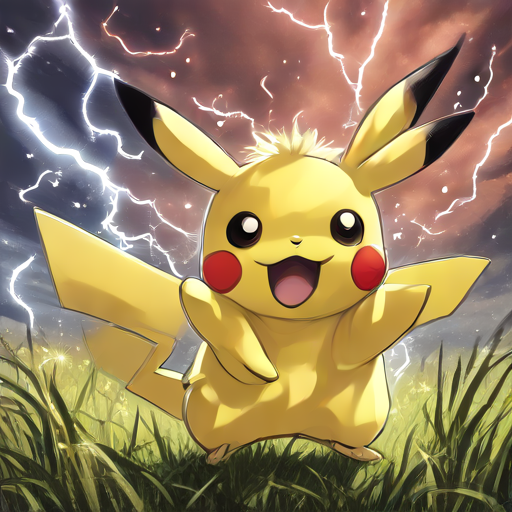

In a meadow so green,
   A Pikachu stands serene,
   Electricity sparks and ignites,
   As he recites his verses so bright.

   His furry body, so yellow and round,
   His mouth open, his tail standing proud,
   He speaks of love, friendship, and power,
   As lightning bolts dance around his flower.

   This scene, so manga-inspired and true,
   A digital illustration, so pure and new,
   A Studio Ghibli-esque masterpiece,
   A Pokemon Go-style dream, so sweet and peaceful.

   [Image: Electrically Charged Verses]

   In this world, so full of delight,
   Pikachu's words, so full of light,
   Spark joy in hearts so young and old,
   As they listen to his tales so bold.

   May his words, so full of hope and cheer,
   Spark love in hearts so near and dear,
   May his message, so pure and bright,
   Spark kindness in hearts so bright and light.




In [47]:
# Modify this prompt to generate different outputs
prompt = "Write a short poem about Pikachu with a picture."


response = openai.chat.completions.create(
    model=DEFAULT_LLM,
    messages=[{"role": "user", "content": prompt}],
    temperature=DEFAULT_TEMPERATURE,
    max_tokens=DEFAULT_MAX_TOKENS,
    top_p=DEFAULT_TOP_P,
    stream=False,
    extra_body={"system_message": SYSTEM_MESSAGE},
)
display_content(response.messages[1]["content"])

## Completion

[OpenAI API Reference](https://platform.openai.com/docs/api-reference/completions/create)


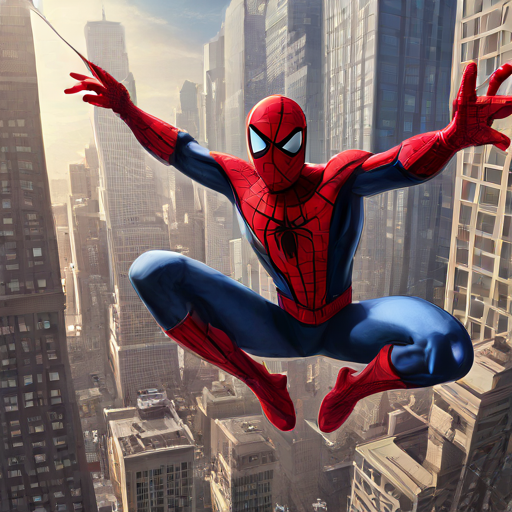

In this city, where danger lurks around,
   A hero in red and blue can be found,
   With great power comes great responsibility,
   Spider-Man swings through the sky with agility.
   
   Leaping from skyscrapers, he spins his web,
   With muscles bulging, he's never been better,
   A true superhero, he saves the day,
   With passion and precision, he's here to stay.
   
   In this image, we see Spidey in action,
   Comic book style, bold and vibrant,
   The art captures his heroic deeds,
   As he swings through the city, he's never been needy.
   
   With great power comes great responsibility,
   Spider-Man lives by this creed,
   He's here to protect, to save the day,
   With his web-slinging ways, he's here to stay.
   
   [Image description: Spider-Man leaps from a skyscraper, his muscles bulging as he spins his web. The art style is bold and comic




In [43]:
# Modify this prompt to generate different outputs
prompt = "Write a short poem about spiderman with an accompanying image."

completion = openai.completions.create(
    model=DEFAULT_LLM,
    prompt=prompt,
    temperature=DEFAULT_TEMPERATURE,
    max_tokens=DEFAULT_MAX_TOKENS,
    top_p=DEFAULT_TOP_P,
    n=1,
    stream=False,
    extra_body={"system_message": SYSTEM_MESSAGE},
)
display_content(completion.choices[0].text)

## Cloning Text to Speech

Any `wav` file in the `voices` directory can be used as a voice.


In [44]:
prompt = "Write a short poem about Taco Bell's Doritos Locos Tacos."
response = requests.post(
    f"{EZLOCALAI_SERVER}/v1/audio/generation",
    headers=HEADERS,
    json={
        "text": prompt,
        "voice": "DukeNukem",
        "language": "en",
    },
)
audio_response = response.json()
display_content(audio_response["data"])

UklGRkbKAgBXQVZFZm10IBAAAAABAAEAwF0AAIC7AAACABAATElTVBoAAABJTkZPSVNGVA4AAABMYXZmNTguNzYuMTAwAGRhdGEAygIA/P/1////BwAJAA8AEQAWABcAGgAdAB4AHQAeABsAHwAgACgALgAwADAAMgA2ADUANQA1ADYANQA1ADUAMwAyADQAMwA0ADUANgAzADMANAA2ADIAMAA2ADMANQAzADMAMwA0ADQAMQAyAC8AMAAvAC4ALAAwACsAKQArACoAJwAkACcAIwAlACUAKAAmACAAJAAfACEAHwAfABkAGgAeABwAHAAWABgAFwAaABkAHAAZABgAGgAbABoAHQAaABsAGQAaAB0AHQAYABgAFwAZABkAGgAaABsAHQAaABkAGwAaABgAGQAUABYAGAAUABcAEQAUABcAFAASAA8AEgANAAsADQAMAA4ADQAIAAgACgAKAAgABwAJAAMABgAKAAwADQAJAAUABAAIAAwACwANAAcACQAJAAUACAANAAYADQALAAkABwANAAsACgAOAAwACwAMAAgABQAEAAsACgAKAAkACQASAAgACQAMAAYACgALAAkABwAGAAUADAAHAAgACQAJAAcADwAPAAwAEAAQABMAEwAQAA4ACwALAAwAEwASABEAEAATABQADgAMAAoADQAMAAkAAgAIAAAAAwAEAAYACwAEAAEABgAKAA0ADQAOAAwA//8BAAoACAAFAAQAAgAAAP7/BwAHAAYAAgAEAAMABQAIAAwADQAQABMAFAAYABIAFgASABQAFgAUABUAFgAXABcAHQAlACEAIAAoACEAFQAYABUADgAaABkAGAAVAB0AIwAjAB4AHgAcACIAIQAiACQAIwAkACYAIQAgABgAGQAZAB4AIAAfABYAHwAjACAAHAAfAB0AIgAiABwAIwAeACEAFwAUAA8ADQAIAAcA+//1//n/9f/x//H/8v/x//H/7v/o/+j/6P/v/+z/

## Text to Speech


In [45]:
# We will use the audio response from the previous cell to transcribe it.
transcription = requests.post(
    f"{EZLOCALAI_SERVER}/v1/audio/transcriptions",
    json={
        "file": audio_response["data"],
        "audio_format": "wav",
        "model": "base",
    },
    headers=HEADERS,
)


print(transcription.json())

{'data': " Write a short poem about Taco Bell's Doritos Locos Tacos."}


## Voice Completion Example


In [46]:
# We will use the audio response from a couple of cells back.
completion = openai.completions.create(
    model=DEFAULT_LLM,
    prompt=audio_response["data"],
    temperature=DEFAULT_TEMPERATURE,
    max_tokens=DEFAULT_MAX_TOKENS,
    top_p=DEFAULT_TOP_P,
    n=1,
    stream=False,
    extra_body={
        "system_message": SYSTEM_MESSAGE,
        "audio_format": "wav",
        "voice": "DukeNukem",
    },
)

response_text = completion.choices[0].text
display_content(response_text)

URL: http://localhost:8091/outputs/0e72a89bb2954e82946afb947b22763d.wav


Crunchy shells, spicy flavor,
   Taco Bell's Doritos Locos Tacos,
   A fusion that's out of this world,
   A taste that sets your taste buds aglow.

   Cheesy goodness in every bite,
   A symphony of flavors that dance,
   A party in your mouth, a fiesta so bright,
   Taco Bell's DLTs, an explosion in a trance.

   A masterpiece crafted by the gods,
   A feast for the senses, a feast for the soul,
   Taco Bell's DLTs, a gift from the gods,
   A culinary delight that makes you whole.

   So come on down, and satisfy your cravings,
   Taco Bell's DLTs, a feast for the senses,
   A symphony of flavors that's never been tamed,
   A feast for the senses that's truly immense.

